In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
v1_data = pd.read_csv('data/single/train/G5NZCJ017507206-config.json-ashik-right-v1-single-2020-03-28-18-15-30.csv', skiprows=1, 
                      header=None, names=['unix_timestamp', 'sensor_id', 'accuracy', 'X Axis Value', 'Y Axis Value', 'Z Axis Value'])

v1_acc_data = v1_data[v1_data["sensor_id"] == 10]
v1_gyro_data = v1_data[v1_data["sensor_id"] == 4]
# print(v1_acc_data.count(), v1_gyro_data.count())

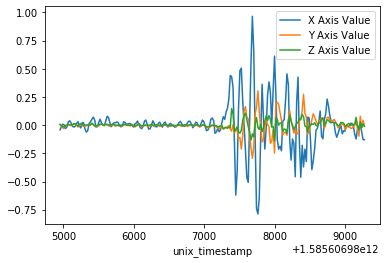

In [4]:
ax = v1_gyro_data.plot(
    x='unix_timestamp', 
    y=['X Axis Value', 'Y Axis Value', 'Z Axis Value'],
#     title='Gyroscope Readings for Vowel 1'
)
fig = ax.get_figure()
fig.savefig('images/v1_gyro.pdf')
# v1_data['unix_timestamp'].shape[0]

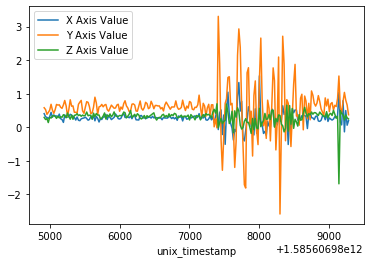

In [5]:
ax = v1_acc_data.plot(
    x='unix_timestamp', 
    y=['X Axis Value', 'Y Axis Value', 'Z Axis Value'],
#     title='Accelerometer Readings for Vowel 1'
)

fig = ax.get_figure()
fig.savefig('images/v1_acc.pdf')

In [6]:
v11_data = pd.read_csv('data/single/train/G5NZCJ017507206-config.json-ashik-right-v11-single-2020-03-28-19-31-49.csv', skiprows=1, 
                      header=None, names=['unix_timestamp', 'sensor_id', 'accuracy', 'X Axis Value', 'Y Axis Value', 'Z Axis Value'])

v11_acc_data = v11_data[v11_data["sensor_id"] == 10]
v11_gyro_data = v11_data[v11_data["sensor_id"] == 4]
# print(v1_acc_data.count(), v1_gyro_data.count())

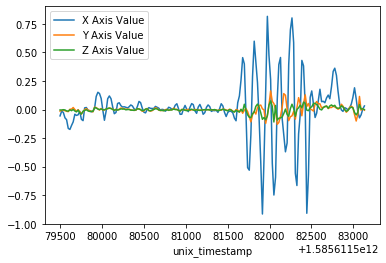

In [7]:
ax = v11_gyro_data.plot(
    x='unix_timestamp',
    y=['X Axis Value', 'Y Axis Value', 'Z Axis Value'],
#     title='Gyroscope Readings for Vowel 11'
)
fig = ax.get_figure()
fig.savefig('images/v11_gyro.pdf')

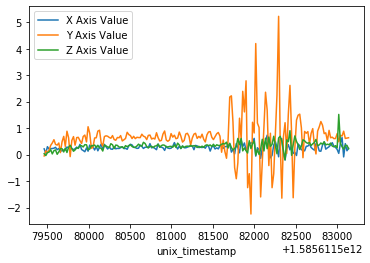

In [8]:
ax = v11_acc_data.plot(
    x='unix_timestamp', 
    y=['X Axis Value', 'Y Axis Value', 'Z Axis Value'],
#     title='Accelerometer Readings for Vowel 11'
)
fig = ax.get_figure()
fig.savefig('images/v11_acc.pdf')

In [9]:
#print(type(v1_acc_data))
#print(type(v1_gyro_data))

#import tensorflow as tf

from pandas import read_csv
def load_file(filepath):
	#dataframe = read_csv(filepath, skiprows = 1, header=None, names=['unix_timestamp', 'sensor_id', 'accuracy', 'x_axis_val', 'y_axis_val', 'z_axis_val'])
  dataframe = read_csv(filepath, skiprows = 1, header=None, names=['x_axis_val', 'y_axis_val', 'z_axis_val'])
  return dataframe.values


#print(tf.__version__)

import glob

def load_file_seperate(filepath):
	#dataframe = read_csv(filepath, skiprows = 1, header=None, names=['unix_timestamp', 'sensor_id', 'accuracy', 'x_axis_val', 'y_axis_val', 'z_axis_val'])
  dataframe = read_csv(filepath, skiprows = 1, header=None, names=['sensor_id','accuracy','x_axis_val', 'y_axis_val', 'z_axis_val'])
  dataframe_acc =  (dataframe[dataframe["sensor_id"] == 10]).values
  dataframe_acc = np.delete(dataframe_acc, [0,1], axis=1)
  dataframe_gyro =  (dataframe[dataframe["sensor_id"] == 4]).values
  dataframe_gyro = np.delete(dataframe_gyro, [0,1], axis=1)
  return dataframe_acc,dataframe_gyro

# test_filepath = "data/single/train/G5NZCJ017507206-config.json-ashik-right-v11-single-2020-03-27-12-28-35.csv"

# hello_acc, hello_gyro = load_file_seperate(test_filepath)
# # hello_acc = hello[np.where(hello[:,0] == 10)]
# # hello_gyro = hello[np.where(hello[:,0] == 4)]
# # print(hello.shape)
# # print(hello)
# print(hello_acc.shape)
# print(hello_gyro.shape)
# print(hello_acc[1])
# print("boka")
# print(hello_gyro[1])


def get_max_size():
  mylist = [f for f in glob.glob("data/single/test/*.csv")]
  mylist += [f for f in glob.glob("data/single/train/*.csv")]
  mx_acc = 0
  mx_gyro = 0
  mn_acc = 800
  mn_gyro = 800
  for s in mylist:
    print(s)
    #cur_data = load_file(s)
    cur_data_acc, cur_data_gyro = load_file_seperate(s)
    ro_acc = cur_data_acc.shape[0]
    ro_gyro = cur_data_gyro.shape[0]
    #print(ro)
    mx_acc = max(mx_acc,ro_acc)
    mx_gyro = max(mx_gyro,ro_gyro)
    mx = max(mx_acc,mx_gyro)
  return mx, mx

# mxa,mxg = get_max_size()
# print("mxaccsize: "+str(mxa)+" mxgyrsize: "+str(mxg))

In [10]:
from numpy import dstack
from numpy import vstack
from sklearn.preprocessing import MinMaxScaler

# data = load_file('data/single/G5NZCJ017507206-config.json-ashik-right-v11-single-2020-03-27-12-28-35.csv') 
# print(type(data))
# print(data.shape)



# def load_group(filenames, prefix=''):
# 	loaded = list()
# 	for name in filenames:
# 		data = load_file(prefix + name)
# 		loaded.append(data)
# 	# stack group so that features are the 3rd dimension
# 	loaded = dstack(loaded)
# 	return loaded

def load_file_padded(mx_acc_size, mx_gyro_size, filepath):
  data_acc, data_gyro = load_file_seperate(filepath)
  extra_acc = mx_acc_size - data_acc.shape[0]
  extra_gyro = mx_gyro_size - data_gyro.shape[0]
  for i in range(extra_acc):
    data_acc = np.append(data_acc,[[0.0,0.0,0.0]],axis=0)
  for i in range(extra_gyro):
    data_gyro = np.append(data_gyro,[[0.0,0.0,0.0]],axis=0)
  return data_acc, data_gyro

# mylist = [f for f in glob.glob("data/single/train/*.csv")]

# data_acc, data_gyro = load_file_padded(mxa,mxg,mylist[7]) 
# print(type(data_acc))
# print(data_acc.shape)
# print(type(data_gyro))
# print(data_gyro.shape)

#print(data)

def get_label(filename): #same as before
  pos1 = filename.find("-v")
  pos2 = filename.find("-single")
  #print(str(pos1)+" "+str(pos2))
  val = int(filename[pos1+2:pos2])
  return val

def load_group(filenames, prefix=''): #train or test group.. for train filenames will be from train...
  loaded_acc = list()
  loaded_gyro = list()
  loaded_label = list()
  #mxa,mxg = get_max_size()
  mxa = 347
  mxg = 347
  #for generalizing change status above 3 lines
  scaler_acc = MinMaxScaler(feature_range=(-1,1))
  scaler_gyro = MinMaxScaler(feature_range=(-1,1))
  for name in filenames:
    #if ("-v1-" in name) or ("-v2-"in name) or ("-v3-"in name):
      #print(name)
      data_acc, data_gyro = load_file_padded(mxa,mxg,prefix + name)
      scaler_acc.fit(data_acc)
      scaler_gyro.fit(data_gyro)
      data_acc_normalized = scaler_acc.transform(data_acc)
      data_gyro_normalized = scaler_gyro.transform(data_gyro)
      #print(name)
      label = get_label(name)
      #if label==1 or label==11:
      #print(label)
      #if label==11:
      #  label = 2
      loaded_acc.append(data_acc_normalized)
      loaded_gyro.append(data_gyro_normalized)
      loaded_label.append(label)
  X_acc = np.stack(loaded_acc,axis=0)
  X_gyro = np.stack(loaded_gyro,axis=0)
  y = np.stack(loaded_label,axis=0)
  y = np.reshape(y,(-1,1))
  return X_acc,X_gyro,y





In [11]:
def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return torch.eye(num_classes, dtype=torch.long)[y]

def load_dataset():
    trainlist = [f for f in glob.glob("data/single/train/*.csv")]
    testlist = [f for f in glob.glob("data/single/test/*.csv")]

    trainX_acc, trainX_gyro, trainy = load_group(trainlist)
    testX_acc, testX_gyro, testy = load_group(testlist)

    trainy = torch.squeeze(torch.tensor(trainy) - 1)
    testy = torch.squeeze(torch.tensor(testy) - 1)
    # print(testy.shape)
    # print(testy)
    # print(trainy.shape,testy.shape)
    
    return torch.Tensor(trainX_acc), torch.Tensor(trainX_gyro), trainy, torch.Tensor(testX_acc), torch.Tensor(testX_gyro), testy
  
trainX_acc, trainX_gyro, trainy, testX_acc, testX_gyro, testy = load_dataset() #ready to go into rnn


In [12]:
print(trainX_acc.shape)
print(trainX_gyro.shape)
print(trainy.shape)
print(testX_acc.shape)
print(testX_gyro.shape)
print(testy.shape)

torch.Size([1115, 347, 3])
torch.Size([1115, 347, 3])
torch.Size([1115])
torch.Size([110, 347, 3])
torch.Size([110, 347, 3])
torch.Size([110])


In [13]:
# convert to: number of examples x channels x height x width
trainX_acc = torch.unsqueeze(trainX_acc.permute(0, 2, 1), dim=2)
trainX_gyro = torch.unsqueeze(trainX_gyro.permute(0, 2, 1), dim=2)

testX_acc = torch.unsqueeze(testX_acc.permute(0, 2, 1), dim=2)
testX_gyro = torch.unsqueeze(testX_gyro.permute(0, 2, 1), dim=2)

print(trainX_acc.shape)
print(trainX_gyro.shape)
print(trainy.shape)
print(testX_acc.shape)
print(testX_gyro.shape)
print(testy.shape)

torch.Size([1115, 3, 1, 347])
torch.Size([1115, 3, 1, 347])
torch.Size([1115])
torch.Size([110, 3, 1, 347])
torch.Size([110, 3, 1, 347])
torch.Size([110])


In [14]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(trainX_acc, trainX_gyro, trainy)
val_dataset = TensorDataset(testX_acc, testX_gyro, testy)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True)

print(len(train_dataloader), len(val_dataloader))

70 7


In [31]:
class Model(nn.Module):
    def __init__(self, num_classes, dropout=0.5):
        super(Model, self).__init__()
        self.num_classes = num_classes
        self.dropout = dropout
        
        self.conv1_acc = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(1, 10), stride=(1, 3))
        self.relu1_acc = nn.ReLU()
        
        self.conv2_acc = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(1, 5), stride=(1, 2))
        self.relu2_acc = nn.ReLU()
        
#         self.gru_acc = nn.GRU(input_size=16, hidden_size=32, batch_first=True)
        
        self.conv1_gyro = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(1, 10), stride=(1, 3))
        self.relu1_gyro = nn.ReLU()
        
        self.conv2_gyro = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(1, 5), stride=(1, 2))
        self.relu2_gyro = nn.ReLU()
        
        #self.gru_gyro = nn.GRU(input_size=16, hidden_size=32, batch_first=True)
        
        self.fc1 = nn.Linear(in_features=55*6, out_features=num_classes)
        #self.relu1_fc = nn.ReLU()
        
        #self.fc2 = nn.Linear(in_features=32, out_features=num_classes)
            
    def forward(self, x_acc, x_gyro):
        x_acc = self.relu1_acc(self.conv1_acc(x_acc))
        x_acc = self.relu2_acc(self.conv2_acc(x_acc))
        #print(x_acc.shape)
        
        #x_acc = torch.squeeze(x_acc).permute(0, 2, 1)
        #_, h_acc = self.gru_acc(x_acc)
        #h_acc = torch.squeeze(h_acc)
        # print(h_acc.shape)
        
        x_gyro = self.relu1_gyro(self.conv1_gyro(x_gyro))
        x_gyro = self.relu2_gyro(self.conv2_gyro(x_gyro))
        #print(x_gyro.shape)
        
        #x_gyro = torch.squeeze(x_gyro).permute(0, 2, 1)
        #_, h_gyro = self.gru_acc(x_gyro)
        #h_gyro = torch.squeeze(h_gyro)
        #print(h_gyro.shape)

        #x = torch.cat([h_acc, h_gyro], dim=1)
        x = torch.cat([x_acc, x_gyro], dim=1)
        x = F.dropout(x, self.dropout, training=self.training)
        #print(x.shape)
        
        x = torch.squeeze(x).view(x.shape[0], -1)
        #print(x.shape)
        #x = self.relu1_fc(self.fc1(x))
        x = self.fc1(x)
        #print(x.shape)
        return x

In [32]:
model = Model(num_classes=11, dropout=0.5)
criterion = nn.CrossEntropyLoss()

for i, (x_acc, x_gyro, label) in enumerate(train_dataloader):
    # print(x_acc.shape, x_gyro.shape)
    prediction = model(x_acc, x_gyro)
    loss = criterion(prediction, label)
    print(loss)
#     print(criterion(label, prediction))
#     print(f_acc.shape, f_gyro.shape)
    break
print(model)

tensor(2.3799, grad_fn=<NllLossBackward>)
Model(
  (conv1_acc): Conv2d(3, 3, kernel_size=(1, 10), stride=(1, 3))
  (relu1_acc): ReLU()
  (conv2_acc): Conv2d(3, 3, kernel_size=(1, 5), stride=(1, 2))
  (relu2_acc): ReLU()
  (conv1_gyro): Conv2d(3, 3, kernel_size=(1, 10), stride=(1, 3))
  (relu1_gyro): ReLU()
  (conv2_gyro): Conv2d(3, 3, kernel_size=(1, 5), stride=(1, 2))
  (relu2_gyro): ReLU()
  (fc1): Linear(in_features=330, out_features=11, bias=True)
)


In [33]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

3923

In [91]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.optim as optim

learning_rate = 5e-4

model = Model(num_classes=11, dropout=0.4)
model.cuda()

criterion = nn.CrossEntropyLoss()
criterion = criterion.cuda()

optimizer = optim.Adam(
    model.parameters(), 
    lr=learning_rate, 
    weight_decay=5e-4
)

scheduler = ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    factor=0.5, 
    patience=10, 
    verbose=True
)

In [98]:
def train_model(number_of_epochs):
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    for epoch in range(number_of_epochs):
        losses, accs = [], []
        for i, (x_acc, x_gyro, label) in enumerate(train_dataloader):
            # print(i, x_acc.shape, x_gyro.shape)
            model.train()
            optimizer.zero_grad()
            x_acc = x_acc.cuda()
            x_gyro = x_gyro.cuda()
            label = label.cuda()
            
            prediction = model(x_acc, x_gyro)
            loss = criterion(prediction, label)
            acc = calculate_accuracy(prediction, label)
            
            losses.append(loss.item())
            accs.append(acc.item())
            
            loss.backward()
            optimizer.step()
            
        mean_val_loss, mean_val_acc = get_validation_loss()
        mean_train_loss = np.mean(losses)
        mean_train_acc = np.mean(accs)
        
        train_losses.append(mean_train_loss)
        val_losses.append(mean_val_loss)
        
        train_accs.append(mean_train_acc)
        val_accs.append(mean_val_acc)
        
#         if (epoch+1) % 10 == 0:
#         print(
#             'Epoch: {:04d}'.format(epoch+1),
#             'train loss: {:.4f}'.format(mean_train_loss),
#             'val loss: {:.4f}'.format(mean_val_loss),
#             'train acc: {:.4f}'.format(mean_train_acc),
#             'val acc: {:.4f}'.format(mean_val_acc)
#         )
        scheduler.step(mean_train_loss)

    return train_losses, val_losses, train_accs, val_accs
        
        
            
def get_validation_loss():
    val_losses = []
    val_accuracies = []
    for i, (x_acc, x_gyro, label) in enumerate(val_dataloader):
        model.eval()
        x_acc = x_acc.cuda()
        x_gyro = x_gyro.cuda()
        label = label.cuda()

        prediction = model(x_acc, x_gyro)
        loss = criterion(prediction, label)
        acc = calculate_accuracy(prediction, label)
        
        val_losses.append(loss.item())
        val_accuracies.append(acc.item())
        
    return np.mean(val_losses), np.mean(val_accuracies)


def calculate_accuracy(prediction, label):
    _, predicted_label = torch.max(prediction, dim=1)
    correct = torch.sum(predicted_label == label)
    return correct * 100 / label.shape[0]

In [ ]:
train_losses, val_losses, train_accs, val_accs = train_model(200)

In [81]:
max(val_accs)

60.57142857142857

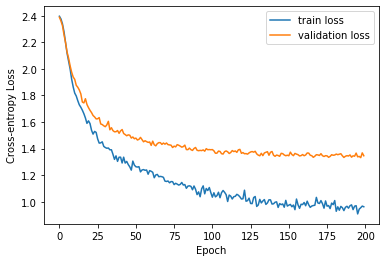

In [117]:
plt.plot(range(200), strain_losses, label='train loss')
plt.plot(range(200), sval_losses, label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy Loss')
plt.legend()
plt.savefig('images/loss.pdf') 

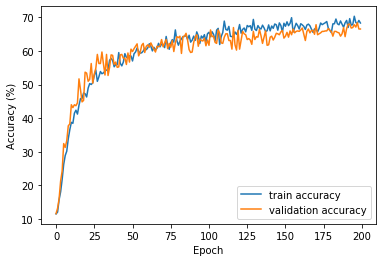

In [118]:
plt.plot(range(200), strain_accs, label='train accuracy')
plt.plot(range(200), sval_accs, label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.savefig('images/accuracy.pdf') 

In [126]:
sum(p.numel() for p in model.parameters())

3923

In [127]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

3923

In [100]:
best_val_accs = [0]
strain_losses, sval_losses, strain_accs, sval_accs = [], [], [], []
for i in range(20):
    print('Train: ', i+1)
    learning_rate = 5e-4

    model = Model(num_classes=11, dropout=0.4)
    model.cuda()

    criterion = nn.CrossEntropyLoss()
    criterion = criterion.cuda()

    optimizer = optim.Adam(
        model.parameters(), 
        lr=learning_rate, 
        weight_decay=5e-4
    )

    scheduler = ReduceLROnPlateau(
        optimizer, 
        mode='min', 
        factor=0.5, 
        patience=10, 
        verbose=False
    )
    train_losses, val_losses, train_accs, val_accs = train_model(200)
    print('Best val acc:', max(val_accs))
    if max(val_accs) > max(best_val_accs):
        strain_losses, sval_losses, strain_accs, sval_accs = train_losses, val_losses, train_accs, val_accs
    best_val_accs.append(max(val_accs))

Train:  1
Best val acc: 58.142857142857146
Train:  2
Best val acc: 61.714285714285715
Train:  3
Best val acc: 57.142857142857146
Train:  4
Best val acc: 55.142857142857146
Train:  5
Best val acc: 55.42857142857143
Train:  6
Best val acc: 67.28571428571429
Train:  7
Best val acc: 62.42857142857143
Train:  8
Best val acc: 57.142857142857146
Train:  9
Best val acc: 68.42857142857143
Train:  10
Best val acc: 62.142857142857146
Train:  11
Best val acc: 64.71428571428571
Train:  12
Best val acc: 63.42857142857143
Train:  13
Best val acc: 62.714285714285715
Train:  14
Best val acc: 64.28571428571429
Train:  15
Best val acc: 59.714285714285715
Train:  16
Best val acc: 68.0
Train:  17
Best val acc: 65.42857142857143
Train:  18
Best val acc: 63.57142857142857
Train:  19
Best val acc: 61.42857142857143
Train:  20
Best val acc: 58.857142857142854


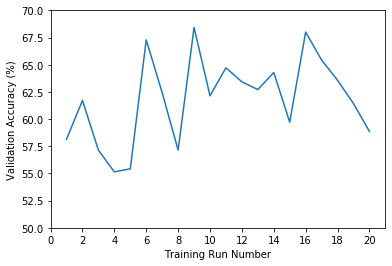

In [123]:
import matplotlib.ticker
plt.plot(range(1,21), best_val_accs[1:])
plt.ylim([50, 70])
plt.xlim(0, 21)
plt.xlabel('Training Run Number')
plt.ylabel('Validation Accuracy (%)')
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.savefig('images/multiple_run_accuracy.pdf') 

In [127]:
np.std(best_val_accs[1:])

3.8871845957752833

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcc761dc250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcc761fe850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcc761d9090>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc761692d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc761697d0>],
 'means': []}

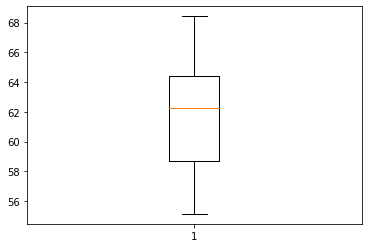

In [124]:
plt.boxplot(best_val_accs[1:])

In [25]:
import pickle
pickle.dump(train_losses, open('results/train_losses.pickle', 'wb'))
pickle.dump(val_losses, open('results/val_losses.pickle', 'wb'))
pickle.dump(train_accs, open('results/train_accs.pickle', 'wb'))
pickle.dump(val_accs, open('results/val_accs.pickle', 'wb'))

In [57]:
val_losses = pickle.load(open('results/val_losses.pickle', 'rb'))
train_losses = pickle.load(open('results/train_losses.pickle', 'rb'))
val_accs = pickle.load(open('results/val_accs.pickle', 'rb'))
train_accs = pickle.load(open('results/train_accs.pickle', 'rb'))
len(val_losses)

100